# Яндекс Музыка

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**
 
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


## Обзор данных

In [109]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [110]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('yandex_music_project.csv')

In [111]:
# получение первых 10 строк таблицы df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [112]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


**Выводы:**
В таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Стиль заголовков

In [113]:
# перечень названий столбцов таблицы df
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


In [114]:
# переименование столбцов
df = df.rename(columns = {'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'})

In [115]:
# проверка результатов - перечень названий столбцов
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Пропуски значений

In [116]:
# подсчёт пропусков
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Например, пропуски в `track` и `artist` не важны для данного исследования, поэтому достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге.Так как нет возможности установить причину этих пропусков, то придётся:
* заполнить и эти пропуски явными обозначениями;
* оценить, насколько они повредят расчётам. 

In [117]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for i in columns_to_replace:
    df[i] = df[i].fillna('unknown')

In [118]:
# подсчёт пропусков
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты

In [119]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

In [120]:
# удаление явных дубликатов
df = df.drop_duplicates()

In [121]:
# проверка на отсутствие дубликатов
print(df.duplicated().sum())

0


In [122]:
# Просмотр уникальных названий жанров

df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [123]:
# Устранение неявных дубликатов
duplicates = ['hip', 'hop', 'hip-hop']

df['genre'] = df['genre'].replace(duplicates, 'hiphop')

In [124]:
# Проверка на неявные дубликаты

print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Выводы:**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Что было сделано?
1. Исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.
2. Пропущенные значения заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

In [125]:
# Подсчёт прослушиваний в каждом городе
print(df.groupby('city')['time'].count())

city
Moscow              42741
Saint-Petersburg    18512
Name: time, dtype: int64


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

In [126]:
# Подсчёт прослушиваний в каждый из трёх дней
df_days = df.groupby('day')['time'].count()

<AxesSubplot:title={'center':'Количество прослушаиваний в понедельник, среду и пятницу'}, xlabel='День недели', ylabel='Количество прослушиваний'>

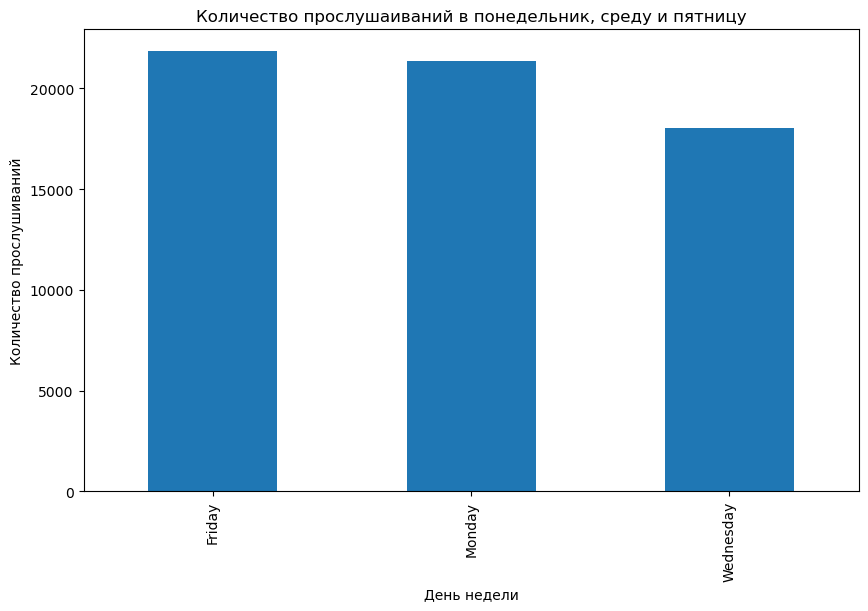

In [127]:
df_days.plot(kind='bar', title='Количество прослушаиваний в понедельник, среду и пятницу',
               ylabel='Количество прослушиваний', xlabel='День недели', figsize=(10, 6))

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

In [128]:
# Таблица с прослушиваниями по каждому городу и по дням недели 
result = df.groupby(['city', 'day']).size().reset_index(name='listenings')
result

,city,day,listenings
0,Moscow,Friday,15945
1,Moscow,Monday,15740
2,Moscow,Wednesday,11056
3,Saint-Petersburg,Friday,5895
4,Saint-Petersburg,Monday,5614
5,Saint-Petersburg,Wednesday,7003


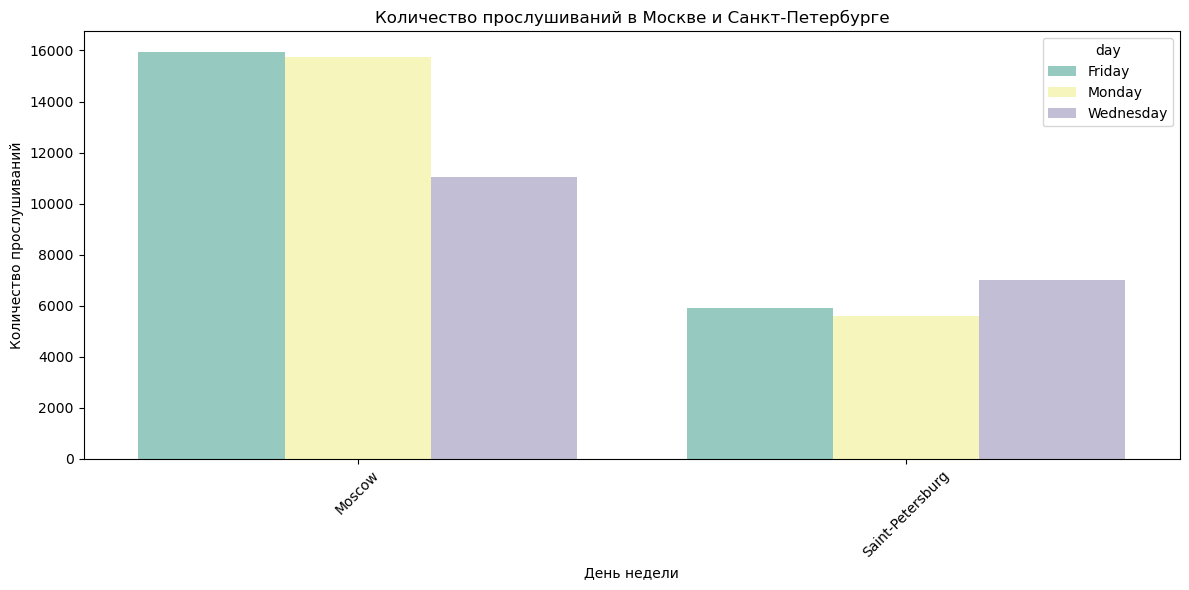

In [130]:
# Визуализируем полученные данные на графике
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='listenings', hue='day', data=result, palette='Set3')
plt.xlabel('День недели')
plt.ylabel('Количество прослушиваний')
plt.title('Количество прослушиваний в Москве и Санкт-Петербурге')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы:**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [144]:
# Поменяем формат столбца с временем
df['time'] = pd.to_datetime(df['time'])

In [162]:
# Создадим маски для фильрации данных по заданному врпеменному диапозону
monday_morning_mask = ((df['day'] == 'Monday') & (df['time'].dt.hour >= 7) & (df['time'].dt.hour < 11))
friday_evening_mask = ((df['day'] == 'Friday') & (df['time'].dt.hour >= 17) & (df['time'].dt.hour < 23))


monday_morning_data = df[monday_morning_mask]
friday_evening_data = df[friday_evening_mask]

In [171]:
# Сгруппируем данные для утра понедельника
monday_morning_result = monday_morning_data.groupby(['city', 'genre']).size().reset_index(name='listenings')
monday_morning_result = monday_morning_result.sort_values(by=['city', 'listenings'], ascending=[True, False])

# Сгруппируем данные для вечера пятницв
friday_evening_result = friday_evening_data.groupby(['city', 'genre']).size().reset_index(name='listenings')
friday_evening_result = friday_evening_result.sort_values(by=['city','listenings'], ascending=[True, False])

In [172]:
# Топ-10 жанров по прослушиваниям по каждому городу в понедельник утром
print("Топ-10 прослушиваемых жанров в понедельник утром:")
for city in monday_morning_result['city'].unique():
    city_data = monday_morning_result[monday_morning_result['city'] == city]
    print(f"City: {city}")
    print(city_data.head(10))
    print("\n")
    
    # Топ-10 жанров по прослушиваниям по каждому городу в пятницу вечером
print("Топ-10 прослушиваемых жанров в пятницу вечером:")
for city in friday_evening_result['city'].unique():
    city_data = friday_evening_result[friday_evening_result['city'] == city]
    print(f"City: {city}")
    print(city_data.head(10))
    print("\n")

Топ-10 прослушиваемых жанров в понедельник утром:
City: Moscow
       city        genre  listenings
97   Moscow          pop         781
31   Moscow        dance         549
43   Moscow   electronic         480
113  Moscow         rock         474
65   Moscow       hiphop         286
116  Moscow       ruspop         186
151  Moscow        world         181
117  Moscow       rusrap         175
2    Moscow  alternative         164
144  Moscow      unknown         161


City: Saint-Petersburg
                 city        genre  listenings
221  Saint-Petersburg          pop         218
172  Saint-Petersburg        dance         182
234  Saint-Petersburg         rock         162
182  Saint-Petersburg   electronic         147
200  Saint-Petersburg       hiphop          80
236  Saint-Petersburg       ruspop          64
154  Saint-Petersburg  alternative          58
237  Saint-Petersburg       rusrap          55
206  Saint-Petersburg         jazz          44
167  Saint-Petersburg    classical 

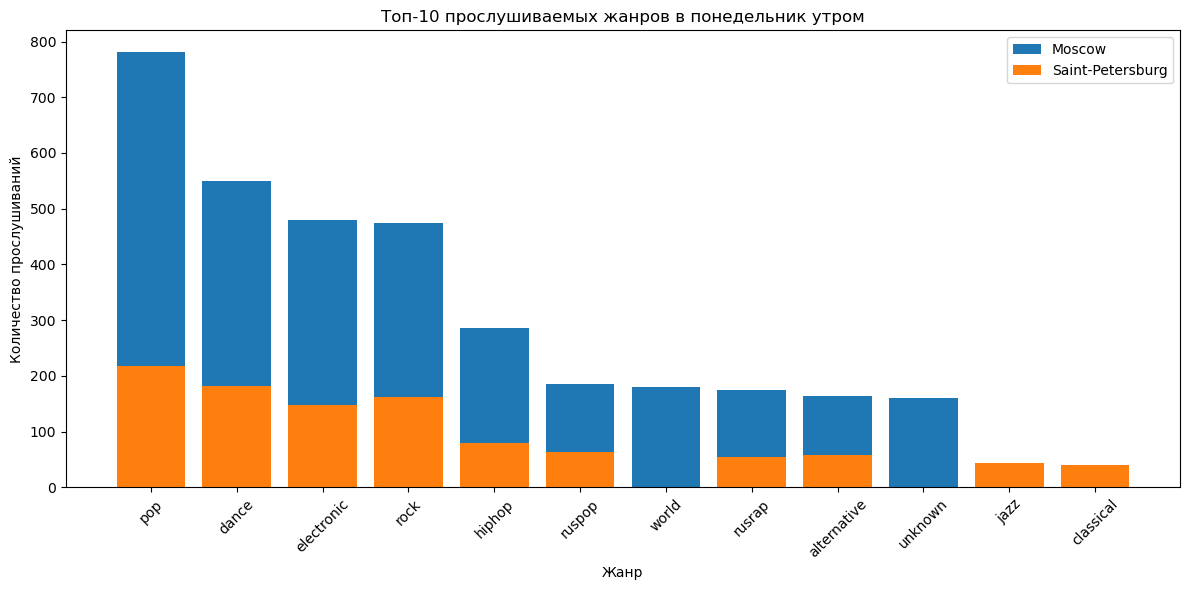

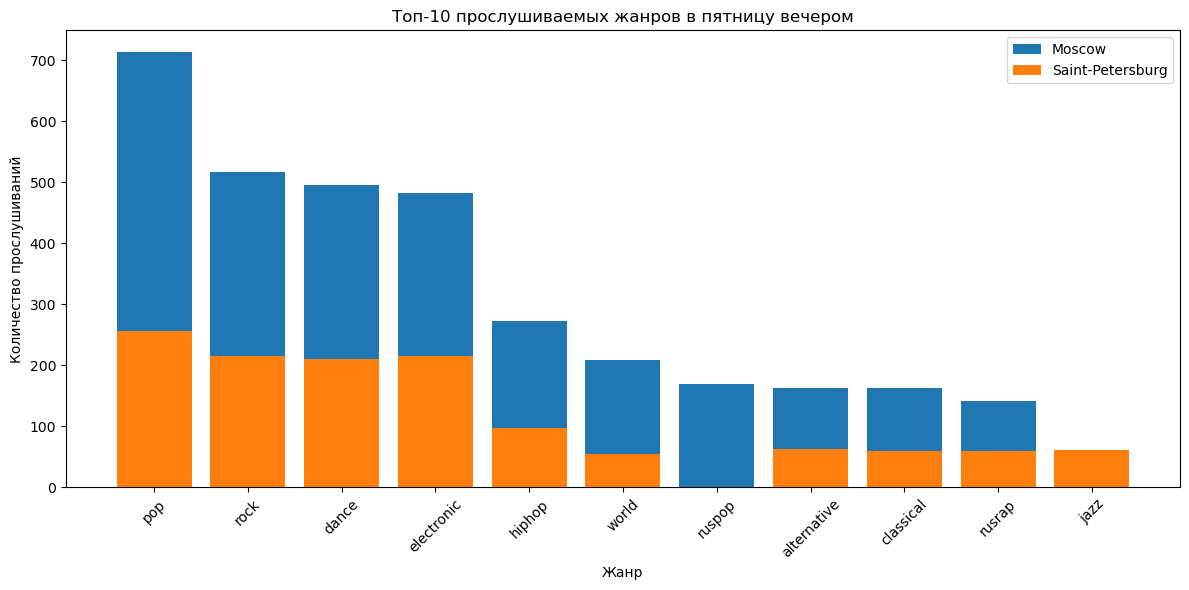

In [173]:
# Создадим график для прослушиваний в понедельник утром
plt.figure(figsize=(12, 6))
for city in monday_morning_result['city'].unique():
    city_data = monday_morning_result[monday_morning_result['city'] == city].head(10)
    plt.bar(city_data['genre'], city_data['listenings'], label=city)

plt.xlabel('Жанр')
plt.ylabel('Количество прослушиваний')
plt.title('Топ-10 прослушиваемых жанров в понедельник утром')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Создадим график для прослушиваний в пятницу вечером
plt.figure(figsize=(12, 6))
for city in friday_evening_result['city'].unique():
    city_data = friday_evening_result[friday_evening_result['city'] == city].head(10)
    plt.bar(city_data['genre'], city_data['listenings'], label=city)

plt.xlabel('Жанр')
plt.ylabel('Количество прослушиваний')
plt.title('Топ-10 прослушиваемых жанров в пятницу вечером')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Выводы:**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [175]:
result = df.groupby(['city', 'genre']).size().reset_index(name='listenings')
result = result.sort_values(by=['city', 'listenings'], ascending=[True, False])

In [179]:
print("Топ-10 прослушиваемых жанров в Москве и Санкт-Петербурге:")
for city in result['city'].unique():
    city_data = result[result['city'] == city]
    print(f"City: {city}")
    print(city_data.head(10))
    print("\n")

Топ-10 прослушиваемых жанров в Москве и Санкт-Петербурге:
City: Moscow
       city        genre  listenings
175  Moscow          pop        5892
55   Moscow        dance        4435
200  Moscow         rock        3965
74   Moscow   electronic        3786
112  Moscow       hiphop        2096
46   Moscow    classical        1616
264  Moscow        world        1432
6    Moscow  alternative        1379
206  Moscow       ruspop        1372
207  Moscow       rusrap        1161


City: Saint-Petersburg
                 city        genre  listenings
407  Saint-Petersburg          pop        2431
310  Saint-Petersburg        dance        1932
429  Saint-Petersburg         rock        1879
325  Saint-Petersburg   electronic        1736
360  Saint-Petersburg       hiphop         960
270  Saint-Petersburg  alternative         649
302  Saint-Petersburg    classical         646
434  Saint-Petersburg       rusrap         564
433  Saint-Petersburg       ruspop         538
475  Saint-Petersburg      

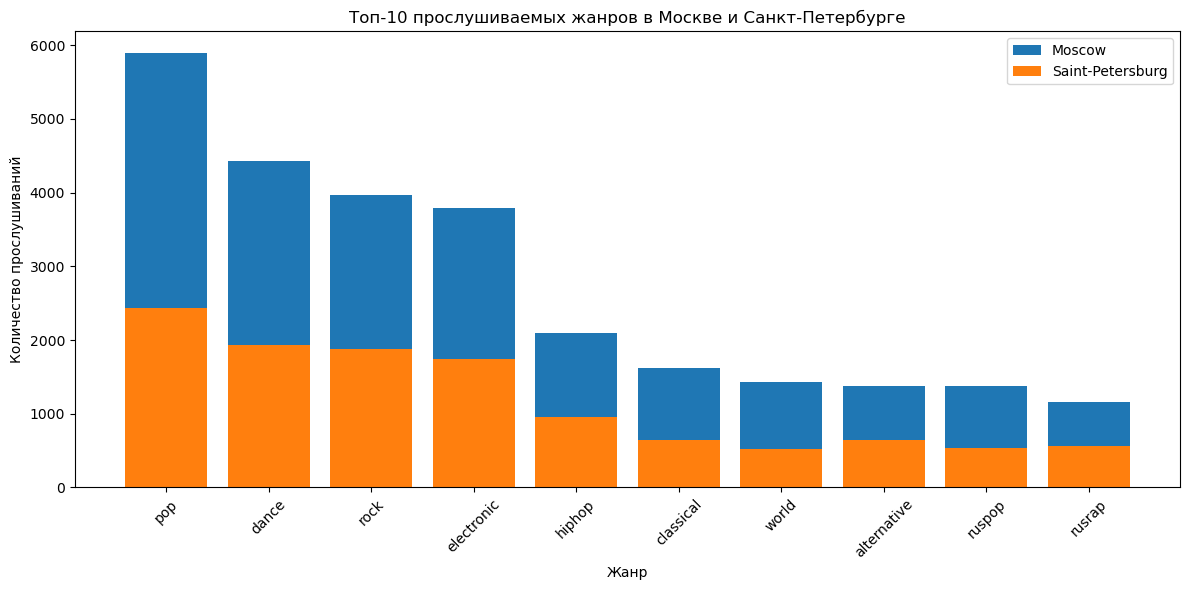

In [178]:
# Создадим график для прослушиваний в понедельник утром
plt.figure(figsize=(12, 6))
for city in result['city'].unique():
    city_data = result[result['city'] == city].head(10)
    plt.bar(city_data['genre'], city_data['listenings'], label=city)

plt.xlabel('Жанр')
plt.ylabel('Количество прослушиваний')
plt.title('Топ-10 прослушиваемых жанров в Москве и Санкт-Петербурге')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Выводы:**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 

## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.